In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd

In [3]:
##function definition
from functions import *
from climada_functions import *
from constants import * 
idx = pd.IndexSlice


## Load and compute indices

In [4]:
#load
ind_fn1 = "weather_indices_CU21_sp_avg_modlist_allmods_historical_ssp585.csv"
boxes_df1 = pd.read_csv(pathcirc+ind_fn1,header=[0,1],index_col=[0,1])
boxes_df1 = boxes_df1.drop("NAO-neg1",axis=1,level=0)
ind_fn2 = "NAO2_weather_indices_CU21_sp_avg_modlist_allmods_historical_ssp585.csv"
boxes_df2 = pd.read_csv(pathcirc+ind_fn2,header=[0,1],index_col=[0,1])
boxes_df = pd.concat([boxes_df2,boxes_df1],axis=1)
rem_indfn = "diff_all_remote_indices_O20_sp_avg_allmods_historical_ssp585.csv"
rem_ind = pd.read_csv(pathcirc+rem_indfn,header=[0],index_col=[0,1])
sfcT = rem_ind.loc[:,"sfcT"]
hm_indfn = "diff_custom_indices_sp_avg_allmods_historical_ssp585.csv"
hm_ind = pd.read_csv(pathcirc+hm_indfn,header=[0],index_col=[0,1])
 


In [68]:
hm_ind

baro      TCWV
model         imem                    
AWI-CM-1-1-MR 0     0.243631  4.991446
              1          NaN       NaN
              2          NaN       NaN
BCC-CSM2-MR   0     0.923933  4.974504
              1          NaN       NaN
...                      ...       ...
MPI-ESM1-2-LR 1     0.856817  4.480371
              2     0.525897  4.600256
KACE-1-0-G    0     1.855826  6.931989
              1     1.626519  7.132045
              2     1.736175  6.830756

[87 rows x 2 columns]

In [5]:
#compute indices
indices = ["NAO","EA","EAWR","SCA"]
periods = ["historical","ssp585"]
itercol = [indices,periods]
col_idx = pd.MultiIndex.from_product(itercol,names=["indice","period"])
#iterrows = [modlist,range(nmems)]
#row_idx= pd.MultiIndex.from_product(iterrows,names=["model","member"])
row_idx = boxes_df.index
ind_df = pd.DataFrame(columns=col_idx,index=row_idx)


In [6]:
#NAO
ind_df.loc[:,("NAO","historical")] = -8.57E-5 - 0.015*boxes_df.loc[:,("NAO-neg1","historical")] + 0.017*boxes_df.loc[:,("NAO-pos1","historical")]
ind_df.loc[:,("NAO","ssp585")] = -8.57E-5 - 0.015*boxes_df.loc[:,("NAO-neg1","ssp585")] + 0.017*boxes_df.loc[:,("NAO-pos1","ssp585")]

#EA
ind_df.loc[:,("EA","historical")] =  -0.005*boxes_df.loc[:,("EA-neg1","historical")] - 0.009*boxes_df.loc[:,("EA-neg2","historical")] + 0.054*boxes_df.loc[:,("EA-pos1","historical")]
ind_df.loc[:,("EA","ssp585")] =  -0.005*boxes_df.loc[:,("EA-neg1","ssp585")] - 0.009*boxes_df.loc[:,("EA-neg2","ssp585")] + 0.054*boxes_df.loc[:,("EA-pos1","ssp585")]

#EAWR
ind_df.loc[:,("EAWR","historical")] =  2.857E-5 - 0.021*boxes_df.loc[:,("EAWR-neg1","historical")] + 0.010*boxes_df.loc[:,("EAWR-pos1","historical")] + 0.007*boxes_df.loc[:,("EAWR-pos2","historical")]
ind_df.loc[:,("EAWR","ssp585")] =  2.857E-5 - 0.021*boxes_df.loc[:,("EAWR-neg1","ssp585")] + 0.010*boxes_df.loc[:,("EAWR-pos1","ssp585")] + 0.007*boxes_df.loc[:,("EAWR-pos2","ssp585")]

#SCA
ind_df.loc[:,("SCA","historical")] =  -5.714E-5 - 0.013*boxes_df.loc[:,("SCA-neg1","historical")] + 0.003*boxes_df.loc[:,("SCA-neg2","historical")] + 0.016*boxes_df.loc[:,("SCA-pos1","historical")]
ind_df.loc[:,("SCA","ssp585")] =  -5.714E-5 - 0.013*boxes_df.loc[:,("SCA-neg1","ssp585")] + 0.003*boxes_df.loc[:,("SCA-neg2","ssp585")] + 0.016*boxes_df.loc[:,("SCA-pos1","ssp585")]


In [56]:
ind_df

indice                    NAO                      EA                \
period             historical    ssp585    historical        ssp585   
model         imem                                                    
AWI-CM-1-1-MR 0     -0.000086 -0.000085 -1.120710e-06  7.932891e-07   
              1           NaN       NaN           NaN           NaN   
              2           NaN       NaN           NaN           NaN   
BCC-CSM2-MR   0     -0.000086 -0.000085  3.341749e-06 -1.807603e-08   
              1           NaN       NaN           NaN           NaN   
...                       ...       ...           ...           ...   
MPI-ESM1-2-LR 1     -0.000086 -0.000087  3.162319e-06 -2.745838e-06   
              2     -0.000086 -0.000086 -2.213598e-06  1.821845e-06   
KACE-1-0-G    0     -0.000086 -0.000085 -1.404080e-09  3.226047e-06   
              1     -0.000088 -0.000086 -3.268398e-06 -1.439998e-06   
              2     -0.000086 -0.000085 -2.200525e-06 -3.199405e-06   

indice                   EAWR                  SCA            
period             historical    ssp585 historical    ssp585  
model         imem                                            
AWI-CM-1-1-MR 0      0.000028  0.000029  -0.000057 -0.000058  
              1           NaN       NaN        NaN       NaN  
              2           NaN       NaN        NaN       NaN  
BCC-CSM2-MR   0      0.000028  0.000029  -0.000059 -0.000057  
              1           NaN       NaN        NaN       NaN  
...                       ...       ...        ...       ...  
MPI-ESM1-2-LR 1      0.000028  0.000027  -0.000059 -0.000057  
              2      0.000029  0.000030  -0.000059 -0.000057  
KACE-1-0-G    0      0.000029  0.000028  -0.000056 -0.000057  
              1      0.000030  0.000030  -0.000058 -0.000056  
              2      0.000029  0.000028  -0.000056 -0.000057  

[87 rows x 8 columns]

In [7]:
## Memsep
#compute fut - past difference
dind_df = ind_df.loc[:,idx[:,"ssp585"]] - ind_df.loc[:,idx[:,"historical"]].values
dind_df = dind_df.droplevel(1,axis=1)

In [8]:
## Memmean
dind_memmean_df = dind_df.groupby("model").mean()


In [9]:
#or memmean before taking the diff
##compute fut - past difference
dind_memmean_df2 = ind_df.loc[:,idx[:,"ssp585"]].groupby("model").mean() - ind_df.loc[:,idx[:,"historical"]].groupby("model").mean().values
dind_memmean_df2 = dind_memmean_df2.droplevel(1,axis=1)

In [10]:
## no normalizing

#standardize
an_dind_memmean_df = dind_memmean_df.copy()
an_dind_memmean_df.loc[:,indices] = an_dind_memmean_df.loc[:,indices] - dind_memmean_df.loc[:,indices].mean()
std_an_dind_memmean_df = dind_memmean_df.copy()
std_an_dind_memmean_df.loc[:,indices] = an_dind_memmean_df.loc[:,indices]/dind_memmean_df.loc[:,indices].std()


In [11]:
dsfcT_memmean = sfcT.groupby("model").mean()

In [12]:
## normalizing by sfcT

ndind_memmean_df = dind_memmean_df.copy()
ndind_memmean_df = ndind_memmean_df.div(dsfcT_memmean,axis=0)
#standardize
an_ndind_memmean_df = ndind_memmean_df.copy()
an_ndind_memmean_df.loc[:,indices] = an_ndind_memmean_df.loc[:,indices] - ndind_memmean_df.loc[:,indices].mean()
std_an_ndind_memmean_df = ndind_memmean_df.copy()
std_an_ndind_memmean_df.loc[:,indices] = an_ndind_memmean_df.loc[:,indices]/ndind_memmean_df.loc[:,indices].std()

In [13]:
ndind_memmean_df

indice,NAO,EA,EAWR,SCA
model,,,,
ACCESS-CM2,0.075033,0.984475,-0.075101,0.118197
ACCESS-ESM1-5,0.074312,0.973260,-0.089555,0.046679
AWI-CM-1-1-MR,0.042759,0.961341,-0.152265,0.137469
BCC-CSM2-MR,0.082202,0.991089,-0.195250,0.079325
CMCC-CM2-SR5,0.148728,1.026195,-0.162246,-0.000643
CMCC-ESM2,0.140698,1.079483,-0.135541,-0.016303
CNRM-CM6-1,0.101727,1.070914,-0.123141,0.087226
CNRM-CM6-1-HR,0.024532,1.050981,-0.133937,0.218014
CNRM-ESM2-1,0.095882,1.082000,-0.134791,0.101611


In [18]:
std_an_dind_memmean_df.corr()

indice,NAO,EA,EAWR,SCA
indice,,,,
NAO,1.000000,0.207157,0.052729,-0.181523
EA,0.207157,1.000000,-0.203426,-0.095833
EAWR,0.052729,-0.203426,1.000000,-0.127859
SCA,-0.181523,-0.095833,-0.127859,1.000000


In [19]:
std_an_ndind_memmean_df.corr()

indice,NAO,EA,EAWR,SCA
indice,,,,
NAO,1.000000,0.069423,0.044445,-0.121266
EA,0.069423,1.000000,-0.327823,-0.040805
EAWR,0.044445,-0.327823,1.000000,-0.154584
SCA,-0.121266,-0.040805,-0.154584,1.000000


In [17]:
1920/30

64.0

In [ ]:
64 past climates

In [21]:
148*30 

4440

In [18]:
14*3*2

84

In [17]:
##subselect models from 1 modelling center
ind_df_1cen = ind_df.copy()
ind_df_1cen = ind_df_1cen.reindex(index=modlist_1cen,level=0)

#compute fut - past difference
dind_df_1cen = ind_df_1cen.loc[:,idx[:,"ssp585"]] - ind_df_1cen.loc[:,idx[:,"historical"]].values

#normalized fut-past diff
ndind_df_1cen = dind_df_1cen.copy()
ndind_df_1cen.loc[:,indices] = ndind_df_1cen.loc[:,indices] / ndind_df_1cen.loc[:,"sfcT"]
dind_df_1cen = dind_df_1cen.droplevel(1,axis=1)
ndind_df_1cen = ndind_df_1cen.droplevel(1,axis=1)

#standardize
an_ndind_memsep_df_1cen = ndind_df_1cen.copy()
an_ndind_memsep_df_1cen = an_ndind_memsep_df_1cen - ndind_df_1cen.mean()
std_an_ndind_memsep_df_1cen = an_ndind_memsep_df_1cen/ndind_df_1cen.std()

#member mean
std_an_ndind_memmean_df_1cen = std_an_ndind_memsep_df_1cen.groupby("model").mean()

KeyError: 'sfcT'

In [121]:
#dind_df.to_csv(pathcirc+"WAN_diff_"+"weather_indices_CU21_sp_avg_allmods_historical_ssp585.csv")
#dind_memmean_df2.to_csv(pathcirc+"diff_memmean_"+"weather_indices_CU21_sp_avg_allmods_historical_ssp585.csv")
#ndind_df.to_csv(pathcirc+"norm_diff_"+"remote_indices_sp_avg_modlist_allscen_historical_ssp585.csv")
#rind_df.to_csv(pathcirc+"ratio_"+"remote_indices_sp_avg_modlist_allscen_historical_ssp585.csv")
#nrind_df.to_csv(pathcirc+"norm_ratio_"+"remote_indices_sp_avg_modlist_allscen_historical_ssp585.csv")
#std_an_dind_memmean_df.to_csv(pathcirc+"std_an_"+"weather_indices_CU21_sp_avg_allmods_historical_ssp585.csv")

## Boxplot indices

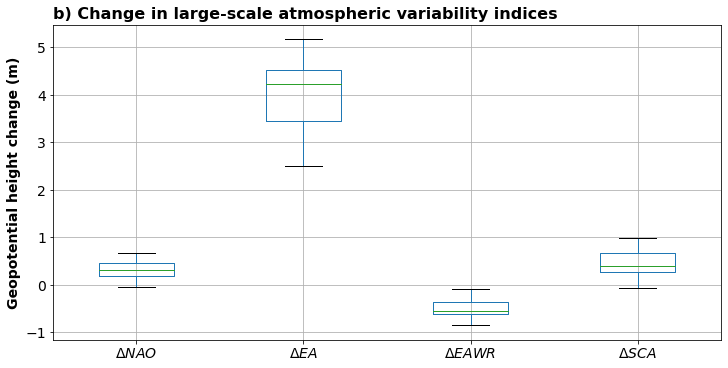

In [16]:
fig = plt.figure(constrained_layout=True,figsize=(10,5))
ax = fig.subplots(nrows=1, ncols=1)
dind_memmean_df.loc[:,indices].boxplot(ax=ax)
ax.set_ylabel("Geopotential height change (m)",fontsize=14,fontweight='bold')
ax.set_title("b) Change in large-scale atmospheric variability indices",fontsize=16,fontweight='bold',loc="left")
ax.set_xticklabels([r"$\Delta NAO$",r"$\Delta EA$",r"$\Delta EAWR$",r"$\Delta SCA$"])
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
savelocation="results/figures/CircScen/indices/"
savefileName = 'WR_ind_Cu21.png'
fig.savefig(savelocation+savefileName,transparent=False,bbox_inches='tight')



## Correlation tables indices

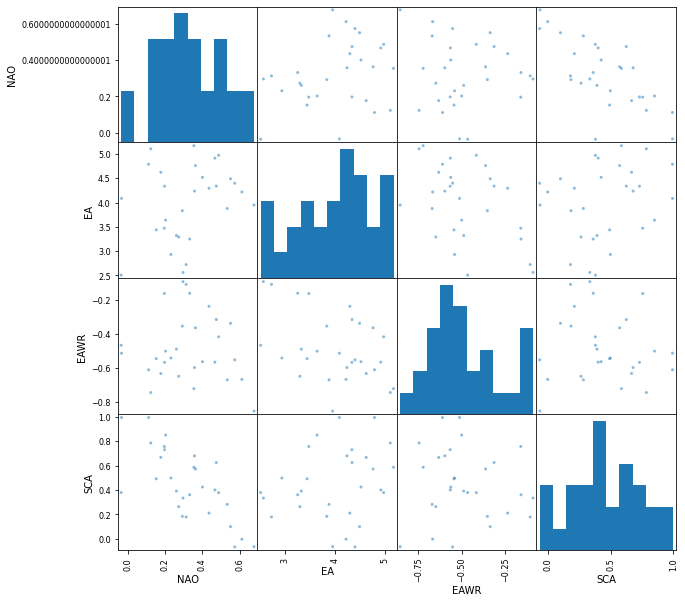

In [21]:
from pandas.plotting import scatter_matrix

scatter_matrix(dind_memmean_df, alpha=0.5, figsize=(10, 10), diagonal="hist");

## Correlation table before/after scaling

In [21]:
matrix1 = dind_memmean_df.corr()
matrix1.index = matrix1.index.rename("before scaling")
matrix1

indice,NAO,EA,EAWR,SCA
before scaling,,,,
NAO,1.000000,0.207157,0.052729,-0.181523
EA,0.207157,1.000000,-0.203426,-0.095833
EAWR,0.052729,-0.203426,1.000000,-0.127859
SCA,-0.181523,-0.095833,-0.127859,1.000000


In [22]:
matrix2 = ndind_memmean_df.corr()
matrix2.index = matrix2.index.rename("after scaling")

matrix2

indice,NAO,EA,EAWR,SCA
after scaling,,,,
NAO,1.000000,0.069423,0.044445,-0.121266
EA,0.069423,1.000000,-0.327823,-0.040805
EAWR,0.044445,-0.327823,1.000000,-0.154584
SCA,-0.121266,-0.040805,-0.154584,1.000000


## Compare with other indices

In [23]:
#standardize
rem_indices = ["pol","trop","strat","NAWH","Nino4-Nino3"]
rem_dind_memmean = rem_ind.groupby("model").mean()
an_rem_dind = rem_dind_memmean.copy()
an_rem_dind = rem_dind_memmean.loc[:,rem_indices] - rem_dind_memmean.loc[:,rem_indices].mean()
std_an_rem_dind = rem_dind_memmean.copy()
std_an_rem_dind.loc[:,rem_indices] = an_rem_dind / rem_dind_memmean.loc[:,rem_indices].std()

#with normalization
rem_ndind_memmean = rem_dind_memmean.copy()
rem_ndind_memmean.loc[:,rem_indices] = rem_ndind_memmean.loc[:,rem_indices].div(dsfcT_memmean,axis=0)
an_rem_ndind = rem_ndind_memmean.copy()
an_rem_ndind = rem_ndind_memmean.loc[:,rem_indices] - rem_ndind_memmean.loc[:,rem_indices].mean()
std_an_rem_ndind = rem_ndind_memmean.copy()
std_an_rem_ndind.loc[:,rem_indices] = an_rem_ndind / rem_ndind_memmean.loc[:,rem_indices].std()


In [24]:
#standardize
hm_indices = ["baro","TCWV"]
hm_dind_memmean = hm_ind.groupby("model").mean()
an_hm_dind = hm_dind_memmean.copy()
an_hm_dind = hm_dind_memmean.loc[:,hm_indices] - hm_dind_memmean.loc[:,hm_indices].mean()
std_an_hm_dind = hm_dind_memmean.copy()
std_an_hm_dind.loc[:,hm_indices] = an_hm_dind / hm_dind_memmean.loc[:,hm_indices].std()

#with normalization
hm_ndind_memmean = hm_dind_memmean.copy()
hm_ndind_memmean.loc[:,hm_indices] = hm_ndind_memmean.loc[:,hm_indices].div(dsfcT_memmean,axis=0)
an_hm_ndind = hm_ndind_memmean.copy()
an_hm_ndind = hm_ndind_memmean.loc[:,hm_indices] - hm_ndind_memmean.loc[:,hm_indices].mean()
std_an_hm_ndind = hm_ndind_memmean.copy()
std_an_hm_ndind.loc[:,hm_indices] = an_hm_ndind / hm_ndind_memmean.loc[:,hm_indices].std()

In [25]:
# compute between indices corr
all_ind = pd.concat([std_an_rem_dind,std_an_dind_memmean_df],axis=1)
all_ind_norm = pd.concat([std_an_rem_ndind,std_an_ndind_memmean_df],axis=1)

In [26]:
all_ind_norm.corr()

,sfcT,pol,trop,strat,NAWH,Nino4-Nino3,NAO,EA,EAWR,SCA
sfcT,1.000000,-0.181492,-0.180469,-0.198071,0.325582,-0.195557,0.029463,0.079651,-0.000528,-0.357769
pol,-0.181492,1.000000,-0.092809,-0.249827,0.107038,0.030220,-0.136322,-0.053197,0.114322,0.045735
trop,-0.180469,-0.092809,1.000000,-0.075856,-0.286141,0.062538,0.081952,-0.321005,0.333092,-0.118487
strat,-0.198071,-0.249827,-0.075856,1.000000,-0.161644,0.720316,-0.133734,0.218510,0.067860,0.173425
NAWH,0.325582,0.107038,-0.286141,-0.161644,1.000000,-0.020702,-0.311657,0.258494,-0.402490,0.250376
Nino4-Nino3,-0.195557,0.030220,0.062538,0.720316,-0.020702,1.000000,0.010058,0.117413,0.150785,0.254995
NAO,0.029463,-0.136322,0.081952,-0.133734,-0.311657,0.010058,1.000000,0.069423,0.044445,-0.121266
EA,0.079651,-0.053197,-0.321005,0.218510,0.258494,0.117413,0.069423,1.000000,-0.327823,-0.040805
EAWR,-0.000528,0.114322,0.333092,0.067860,-0.402490,0.150785,0.044445,-0.327823,1.000000,-0.154584
SCA,-0.357769,0.045735,-0.118487,0.173425,0.250376,0.254995,-0.121266,-0.040805,-0.154584,1.000000


## Check correlations with boostrapping

In [27]:
from random import sample

In [38]:
# select vars
nreps = 10000
modlist = modlist_ssp585 + modlist_allscen
ind = all_ind_norm
ind_names = ["sfcT"]+rem_indices+indices
nind = len(ind_names)
sample_size = len(modlist)
sub_sample_size  = int(round(sample_size/2,0))

# store vars
resarr = np.nan * np.ones(shape=(nind,nind,nreps))

for rep in range(nreps):
    subsel = sample(modlist, k=sub_sample_size)
    resarr[:,:,rep] = ind.loc[subsel].corr()
    
    

In [39]:
qt975 = np.quantile(resarr,0.975,axis=2)
qt05 = np.quantile(resarr,0.5,axis=2)
qt025 = np.quantile(resarr,0.025,axis=2)

In [40]:
df25 = pd.DataFrame(qt025,index=ind_names,columns=ind_names)
df25.index.name = "2.5 percentile"
df25

,sfcT,pol,trop,strat,NAWH,Nino4-Nino3,NAO,EA,EAWR,SCA
2.5 percentile,,,,,,,,,,
sfcT,1.000000,-0.562001,-0.546659,-0.526357,-0.008554,-0.516759,-0.409382,-0.362041,-0.411580,-0.659200
pol,-0.562001,1.000000,-0.458969,-0.603628,-0.578125,-0.521445,-0.455065,-0.342490,-0.389465,-0.404658
trop,-0.546659,-0.458969,1.000000,-0.393484,-0.620329,-0.361314,-0.414803,-0.651726,-0.173886,-0.463770
strat,-0.526357,-0.603628,-0.393484,1.000000,-0.569646,0.249113,-0.754509,-0.320726,-0.480128,-0.301297
NAWH,-0.008554,-0.578125,-0.620329,-0.569646,1.000000,-0.524275,-0.614357,-0.287722,-0.715932,-0.221659
Nino4-Nino3,-0.516759,-0.521445,-0.361314,0.249113,-0.524275,1.000000,-0.504148,-0.471867,-0.379687,-0.397786
NAO,-0.409382,-0.455065,-0.414803,-0.754509,-0.614357,-0.504148,1.000000,-0.422581,-0.558859,-0.545375
EA,-0.362041,-0.342490,-0.651726,-0.320726,-0.287722,-0.471867,-0.422581,1.000000,-0.780002,-0.606998
EAWR,-0.411580,-0.389465,-0.173886,-0.480128,-0.715932,-0.379687,-0.558859,-0.780002,1.000000,-0.567737


In [41]:
#names = indices
df50 = pd.DataFrame(qt05,index=ind_names,columns=ind_names)
df50.index.name = "50 percentile"
df50

,sfcT,pol,trop,strat,NAWH,Nino4-Nino3,NAO,EA,EAWR,SCA
50 percentile,,,,,,,,,,
sfcT,1.000000,-0.207440,-0.182688,-0.202517,0.333861,-0.199021,0.025258,0.074606,0.001597,-0.360527
pol,-0.207440,1.000000,-0.105408,-0.286901,0.116931,0.050230,-0.137274,-0.042967,0.131354,0.053174
trop,-0.182688,-0.105408,1.000000,-0.079504,-0.292241,0.056207,0.081798,-0.326778,0.334089,-0.125935
strat,-0.202517,-0.286901,-0.079504,1.000000,-0.175642,0.725035,-0.150314,0.228336,0.080251,0.168283
NAWH,0.333861,0.116931,-0.292241,-0.175642,1.000000,-0.014912,-0.316777,0.260702,-0.408722,0.264892
Nino4-Nino3,-0.199021,0.050230,0.056207,0.725035,-0.014912,1.000000,0.004472,0.124025,0.167254,0.259245
NAO,0.025258,-0.137274,0.081798,-0.150314,-0.316777,0.004472,1.000000,0.066921,0.058056,-0.122241
EA,0.074606,-0.042967,-0.326778,0.228336,0.260702,0.124025,0.066921,1.000000,-0.329734,-0.032249
EAWR,0.001597,0.131354,0.334089,0.080251,-0.408722,0.167254,0.058056,-0.329734,1.000000,-0.159376


In [42]:
df975 = pd.DataFrame(qt975,index=ind_names,columns=ind_names)
df975.index.name = "97.5 percentile"
df975

,sfcT,pol,trop,strat,NAWH,Nino4-Nino3,NAO,EA,EAWR,SCA
97.5 percentile,,,,,,,,,,
sfcT,1.000000,0.136567,0.296749,0.265236,0.626593,0.179340,0.447971,0.451442,0.374783,0.014342
pol,0.136567,1.000000,0.177125,0.305008,0.417133,0.422206,0.480427,0.452298,0.502469,0.382086
trop,0.296749,0.177125,1.000000,0.271991,0.281477,0.480124,0.457671,0.147590,0.682632,0.366910
strat,0.265236,0.305008,0.271991,1.000000,0.289724,0.900343,0.325898,0.578005,0.613901,0.632822
NAWH,0.626593,0.417133,0.281477,0.289724,1.000000,0.484651,0.081788,0.639898,0.101452,0.658452
Nino4-Nino3,0.179340,0.422206,0.480124,0.900343,0.484651,1.000000,0.390767,0.513244,0.675440,0.699098
NAO,0.447971,0.480427,0.457671,0.325898,0.081788,0.390767,1.000000,0.572615,0.490101,0.207539
EA,0.451442,0.452298,0.147590,0.578005,0.639898,0.513244,0.572615,1.000000,0.189314,0.508747
EAWR,0.374783,0.502469,0.682632,0.613901,0.101452,0.675440,0.490101,0.189314,1.000000,0.316904


In [43]:
dfpos = ind.corr()[(df975 > 0) & (df25 > 0 )]
dfneg = ind.corr()[(df975 < 0) & (df25 < 0 )]

In [44]:
dfboth = dfpos.copy()
dfboth[dfboth.isnull()] = dfneg

In [45]:
keep = np.triu(np.ones(dfboth.shape)).astype('bool').reshape(dfboth.size)

In [46]:
s  = dfboth.style.format(precision=2, na_rep='-')
s

,sfcT,pol,trop,strat,NAWH,Nino4-Nino3,NAO,EA,EAWR,SCA
sfcT,1.00,-,-,-,-,-,-,-,-,-
pol,-,1.00,-,-,-,-,-,-,-,-
trop,-,-,1.00,-,-,-,-,-,-,-
strat,-,-,-,1.00,-,0.72,-,-,-,-
NAWH,-,-,-,-,1.00,-,-,-,-,-
Nino4-Nino3,-,-,-,0.72,-,1.00,-,-,-,-
NAO,-,-,-,-,-,-,1.00,-,-,-
EA,-,-,-,-,-,-,-,1.00,-,-
EAWR,-,-,-,-,-,-,-,-,1.00,-
SCA,-,-,-,-,-,-,-,-,-,1.00


In [56]:
print(s.to_latex())

\begin{tabular}{lrrrrrrrrrr}
 & sfcT & pol & trop & strat & NAWH & Nino4-Nino3 & NAO & EA & EAWR & SCA \\
sfcT & 1.00 & 0.73 & 0.95 & - & 0.97 & - & - & 0.92 & - & 0.30 \\
pol & 0.73 & 1.00 & 0.67 & - & 0.76 & - & - & 0.59 & -0.44 & 0.50 \\
trop & 0.95 & 0.67 & 1.00 & - & 0.92 & - & - & 0.92 & - & - \\
strat & - & - & - & 1.00 & - & 0.66 & 0.41 & - & 0.52 & -0.54 \\
NAWH & 0.97 & 0.76 & 0.92 & - & 1.00 & - & - & 0.88 & - & 0.43 \\
Nino4-Nino3 & - & - & - & 0.66 & - & 1.00 & - & - & - & - \\
NAO & - & - & - & 0.41 & - & - & 1.00 & - & - & -0.71 \\
EA & 0.92 & 0.59 & 0.92 & - & 0.88 & - & - & 1.00 & -0.44 & - \\
EAWR & - & -0.44 & - & 0.52 & - & - & - & -0.44 & 1.00 & - \\
SCA & 0.30 & 0.50 & - & -0.54 & 0.43 & - & -0.71 & - & - & 1.00 \\
\end{tabular}



## Check correlation with t-test

In [27]:
from scipy.stats import t 

In [32]:
nmods = len(all_ind_norm)
corr_df = all_ind_norm.corr()
tstat = corr_df * (nmods-2)/(1-corr_df**2)

In [33]:
alpha = 0.05  # significance level = 5% 
df = nmods-1  # degrees of freedom                                        
                                           
vmin = t.ppf(alpha/2, df) 
vmax = t.ppf(1 - alpha/2, df) 
print(f'vmin: {vmin}, vmax: {vmax}') 


vmin: -2.048407141795244, vmax: 2.048407141795244


In [34]:
sign_ttest = corr_df[abs(tstat) >= vmax]
s_ttest  = sign_ttest.style.format(precision=2, na_rep='-')
s_ttest

,sfcT,pol,trop,strat,NAWH,Nino4-Nino3,NAO,EA,EAWR,SCA
sfcT,1.00,-0.18,-0.18,-0.20,0.33,-0.20,-0.17,-0.33,0.09,-
pol,-0.18,1.00,-0.09,-0.25,0.11,-,-0.35,-0.15,-0.23,0.46
trop,-0.18,-0.09,1.00,-0.08,-0.29,-,0.15,0.41,-0.23,-
strat,-0.20,-0.25,-0.08,1.00,-0.16,0.72,0.47,-,0.47,-0.42
NAWH,0.33,0.11,-0.29,-0.16,1.00,-,-0.45,-0.26,0.47,0.50
Nino4-Nino3,-0.20,-,-,0.72,-,1.00,0.32,-0.14,0.24,-0.23
NAO,-0.17,-0.35,0.15,0.47,-0.45,0.32,1.00,0.47,-,-0.73
EA,-0.33,-0.15,0.41,-,-0.26,-0.14,0.47,1.00,-0.25,-0.11
EAWR,0.09,-0.23,-0.23,0.47,0.47,0.24,-,-0.25,1.00,0.10
SCA,-,0.46,-,-0.42,0.50,-0.23,-0.73,-0.11,0.10,1.00


## Phase plot indices

(1.0, 2.5)

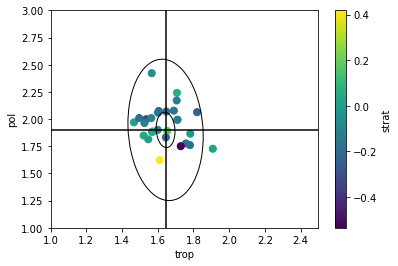

In [230]:
fig = plt.figure()
ax = fig.subplots(nrows=1,ncols=1)

x = ndind_memmean_df["trop"]
y = ndind_memmean_df["pol"]
z = ndind_memmean_df["strat"]
ndind_memmean_df.plot.scatter(ax=ax,x="trop", y="pol", c="strat", cmap="viridis", s=50);
confidence_ellipse2(x, y, ax, n_std=0.5,edgecolor='black')
confidence_ellipse2(x, y, ax, n_std=2,edgecolor='black')

ax.hlines(y.mean(),xmin=-5,xmax=5,color='k')
ax.vlines(x.mean(),ymin=-6,ymax=6,color='k')
ax.set_ylim((1,3))
ax.set_xlim((1,2.5))

In [195]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
def confidence_ellipse(x, y, ax, n_std=3.0, scale_x=None,scale_y=None, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.

    if not scale_x:    
        scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)
    # calculating the standard deviation of y ...
    if not scale_y:
        scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

def confidence_ellipse2(x, y, ax, n_std=3, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.

    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)
    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)



## select models

In [256]:
polmods_pos = std_an_ndind_memmean_df.where(std_an_ndind_memmean_df["pol"]>0.25).dropna(how="all").index.tolist()
polmods_neg = std_an_ndind_memmean_df.where(std_an_ndind_memmean_df["pol"]<-0.25).dropna(how="all").index.tolist()

In [258]:
polmods_neg

['CNRM-CM6-1',
 'CNRM-CM6-1-HR',
 'CNRM-ESM2-1',
 'GISS-E2-1-G',
 'HadGEM3-GC31-MM',
 'INM-CM4-8',
 'KACE-1-0-G']